In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
import math
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126426 entries, 0 to 126425
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Id                                  126426 non-null  int64  
 1   Elevation                           126397 non-null  float64
 2   Aspect                              126409 non-null  float64
 3   Slope                               126419 non-null  float64
 4   Horizontal_Distance_To_Hydrology    126413 non-null  float64
 5   Vertical_Distance_To_Hydrology      126419 non-null  float64
 6   Horizontal_Distance_To_Roadways     126419 non-null  float64
 7   Hillshade_9am                       126417 non-null  float64
 8   Hillshade_Noon                      126417 non-null  float64
 9   Hillshade_3pm                       126407 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  126416 non-null  float64
 11  Wilderness_Area1          

In [3]:
df = df.drop(["Id"],axis=1)
df = df.drop(df.columns[10:55], axis=1)
df.info()

#Bu blokta kuullanılmayacak olan Id niteliği ve ilk 10 nitelikten sonrası sütun bazında droplanıyor.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126426 entries, 0 to 126425
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           126397 non-null  float64
 1   Aspect                              126409 non-null  float64
 2   Slope                               126419 non-null  float64
 3   Horizontal_Distance_To_Hydrology    126413 non-null  float64
 4   Vertical_Distance_To_Hydrology      126419 non-null  float64
 5   Horizontal_Distance_To_Roadways     126419 non-null  float64
 6   Hillshade_9am                       126417 non-null  float64
 7   Hillshade_Noon                      126417 non-null  float64
 8   Hillshade_3pm                       126407 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  126416 non-null  float64
dtypes: float64(10)
memory usage: 9.6 MB


In [4]:
data_c = df.copy()
for i in data_c.columns: 
    data_c[i]=data_c[i].fillna(data_c[i].mean()) #Boş verileri ortalamayla dolduruyorum.
    data_c[i]=data_c[i].ravel() #düzleştirme yapıyoruz.

AYKIRI DEĞERLERİN TEMİZLLENMESİ

In [5]:

for i in data_c.columns:
    
    IQR = (np.quantile(data_c[i], 0.75))-(np.quantile(data_c[i], 0.25)) #Aykırı verilerin yerine ortalamalarını koydum.
    ustSinir = np.quantile(data_c[i], 0.75)+(1.5*IQR)
    altSinir = np.quantile(data_c[i], 0.25)-(1.5*IQR)
    data_c[i] = data_c[i].mask(data_c[i] > ustSinir,data_c[i].mean())
    data_c[i] = data_c[i].mask(data_c[i] < altSinir,data_c[i].mean()) 


In [6]:
x=data_c.iloc[:10000,:].values #ram hatası aldığım için verilerin ilk 10000 satırını train olarak kullanacağım x değişkenine atıyorum.
x.shape

(10000, 10)

BÖLÜMLEMELİ KÜMELEME K-MEANS

Text(0.5, 1.0, 'Optimum küme sayısı')

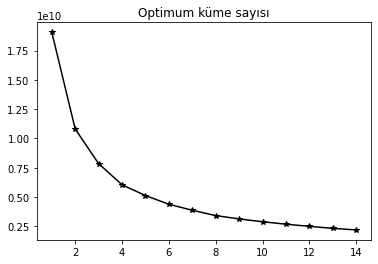

In [7]:
a = []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(x)
    a.append(kmeans.inertia_)  

plt.plot(range(1,15),a,marker="*",c="black")
plt.title("Optimum küme sayısı")#bu blokta 1 ve 15 arası tüm küme sayılarını deneyip en uygun olanı buluyorum.

In [20]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3) #küme sayısını 3 alıyorum
k_model =kmeans.fit(x) #burada model fit edilir.
y_kmeans = kmeans.predict(x) #tahmin sonuçları alınır.

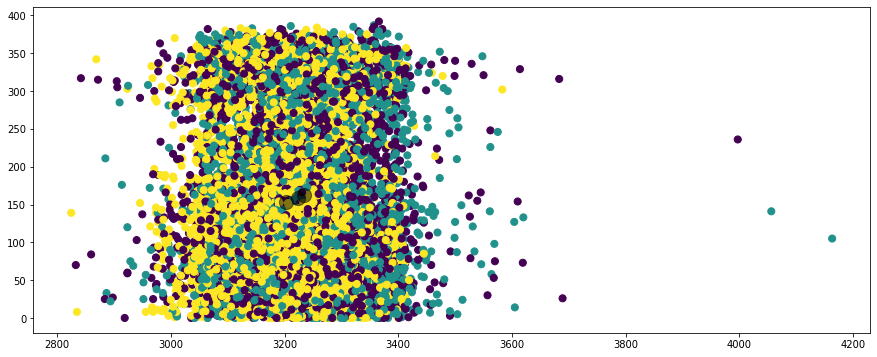

In [21]:
plt.figure(figsize=(15,6)) #grafik boyutunu belirliyoruz
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis') #grafiğin rengini seçiyoruz, x ve y düzlemlerine hangi değerini alacağını söylüyoruz.

centers = kmeans.cluster_centers_ #küme merkezleri
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)# küme merkezlerini de grafiğe ekliyoruz.

YOĞUNLUK TABANLI KÜMELEME - DBSCAN

In [10]:
t = data_c.iloc[:10000,:3].values # Burada başta ilk 10 niteliği aldığım x'i kullandım fakat nitelikler bağdaşmadı ve tüm labellar -1 oldu buna çözüm olarak nitelikleri azalttım.
t.shape

(10000, 3)

In [22]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=6,min_samples=5,metric='euclidean') #parametreleri seçtim.
db_model=db.fit(t) #Nitelikleri azalttığım t'yi modele verdim.
label=db_model.labels_

In [23]:
label #labelları kontrol etmek için yazdırdım.

array([-1,  0,  1, ..., -1,  4,  4], dtype=int64)

In [26]:
from sklearn import metrics

merkez_noktalar=np.zeros_like(label,dtype=bool)
merkez_noktalar[db.core_sample_indices_]=True


n_clusters=len(set(label))- (1 if -1 in label else 0)#kaç küme oluştuğunu hesaplıyoruz.
print("küme sayısı:",n_clusters)

küme sayısı: 241


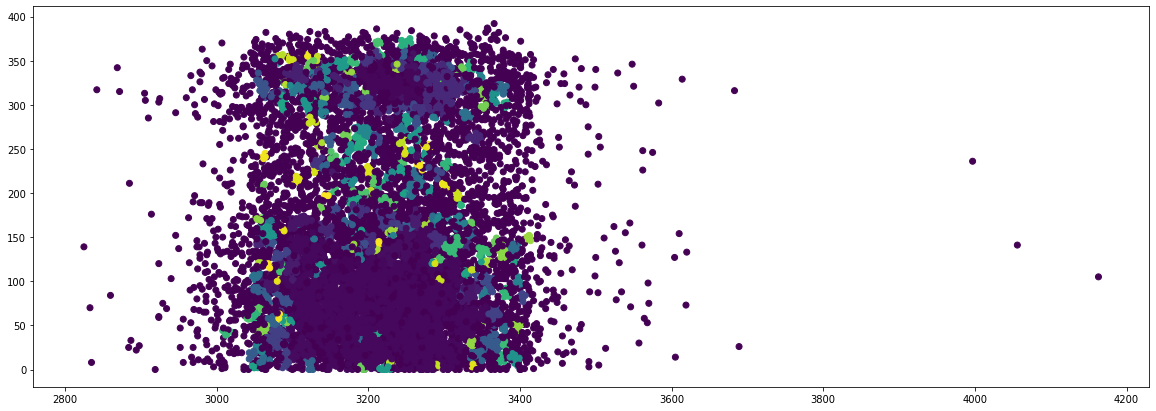

In [25]:
plt.figure(figsize=(20,7))

plt.scatter(t[:10000, 0], t[:10000, 1], c = label)
plt.show()
#yukarıda görünen sütunlara göre veri görselleştirme yapıyoruz.

HİYERARŞİK KÜMELEME - AGNES

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster  import  OPTICS

In [16]:
agnes = AgglomerativeClustering(n_clusters=5, affinity= "euclidean") #küme sayısını ve uzaklık hesaplama ölçütünü seçiyoruz.
y_hc = agnes.fit_predict(x) #modeli fit ediyoruz.
y_hc

array([0, 1, 0, ..., 0, 2, 0], dtype=int64)

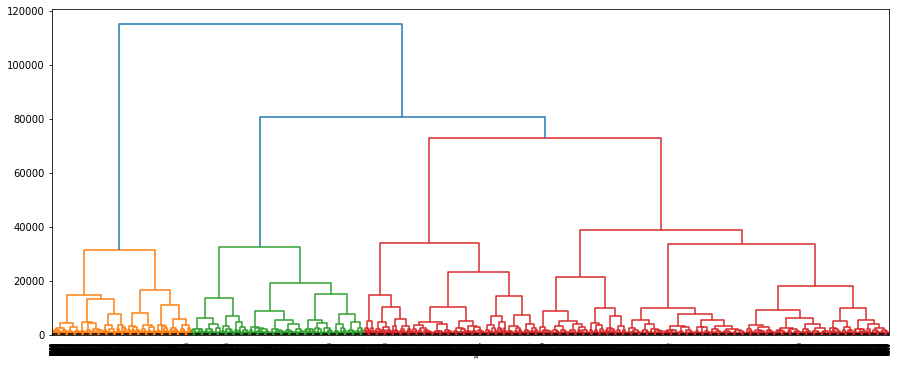

In [152]:
labels = range(1,10001)
linked = linkage(x, "ward") 

plt.figure(figsize=(15,6)) #grafik boyutunu ayarlıyoruz.
dendrogram(linked,
           orientation="top",
           labels=labels,
           show_leaf_counts=True)
plt.axhline(200,ls = "--", c ="k")
plt.show() #dendogramı çizdiriyorum.

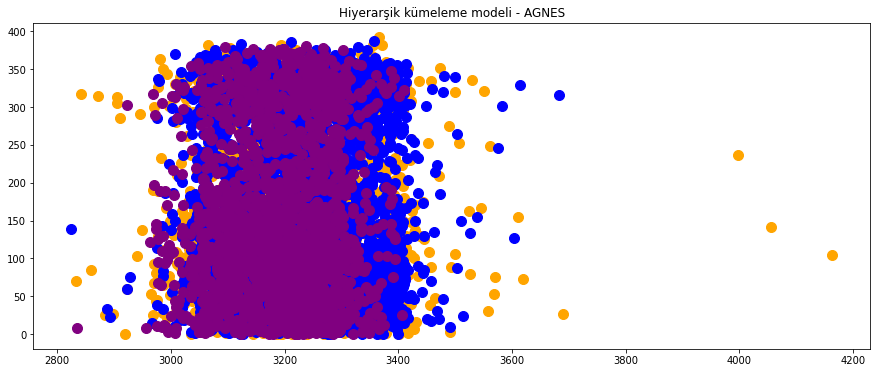

In [17]:
plt.figure(figsize=(15,6)) #grafik boyutunu ayarlıyoruz.

plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='orange', label ='Cluster 1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='purple', label ='Cluster 3')
#sütunlara göre kümeleri karşılaştırarak görselleştirme yapıyoruz.
plt.title('Hiyerarşik kümeleme modeli - AGNES')
plt.show()

SONUÇLAR TABLOSU

In [27]:
kMeans_cluster = k_model.labels_ #k-means tahmin labellerını alıyorum

dbscan_cluster = db_model.labels_ #dbscan tahmin labellerını alıyorum

agnes_cluster = y_hc #agglomerative tahmin labellerını alıyorum

In [28]:
sonuc_cluster = pd.DataFrame({"Elevation" : data_c.iloc[:10000,:].index ,"AGNES-Cluster" : agnes_cluster , "DBSCAN-Cluster" : dbscan_cluster, "KMEANS-Cluster" : kMeans_cluster  })
sonuc_cluster #tüm sonuçlar ile sonuc_cluster adlı bir dataframe oluşturuyorum.

,Elevation,AGNES-Cluster,DBSCAN-Cluster,KMEANS-Cluster
0,0,0,-1,0
1,1,1,0,0
2,2,0,1,0
3,3,2,2,2
4,4,2,-1,2
...,...,...,...,...
9995,9995,3,4,1
9996,9996,4,-1,2
9997,9997,0,-1,0
9998,9998,2,4,2
